# Introduction to Jupyter notebooks

You can use notebooks to write and run Python code. It is good for documenting workflows, especially for data science.

## What is a notebook?
It's a file that contains formatted text and code. You can alternate code blocks and text blocks and read them from top to bottom.

## Why would I use this?
### Document your process
- All of your code can live in one file, but steps can be broken up into separate code blocks (instead of one big pile of spaghetti code). 
- Since it supports formatted text (in Markdown), it is easy to describe the why's and not just the how's.
- Seeing the results of code inline means you don't have to pepper print statements to describe what step of results you're looking at.

### Sharing is caring
- You can send your notebook files to a fellow data enthusiasts.
- They can run your code and understand your methods, reproduce your results, or repurpose your code for their own analysis.

## Example analysis
We'll be looking at a CSV dataset of people who tip at restaurants. The source data can be found in `tips.csv`

### Import dataset

In [1]:
import pandas

tips = pandas.read_csv('tips.csv')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [2]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Clean the data

Column: sex

In [3]:
tips['sex'].value_counts()

Male        149
Female       81
”male"        5
”F”           2
F             2
M             2
”female"      2
”M”           1
Name: sex, dtype: int64

In [16]:
tips['sex'] = tips['sex'].str.title()
tips.loc[tips['sex'].str.contains("F"), 'sex'] = "Female"
tips.loc[tips['sex'].str.contains("M"), 'sex'] = "Male"

Column: smoker

In [4]:
tips['smoker'].value_counts()

No      148
Yes      93
”No"      3
Name: smoker, dtype: int64

In [24]:
tips['smoker'] = tips['smoker'].str.replace('"', '')
tips['smoker'] = tips['smoker'].str.replace('”', '')

## Plot the data

In [3]:
import seaborn

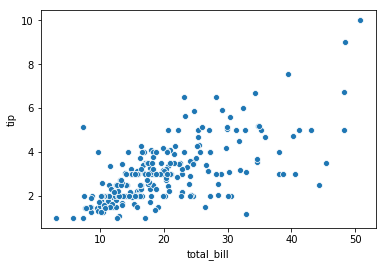

In [4]:
plot = seaborn.scatterplot(x='total_bill', y='tip', data=tips)

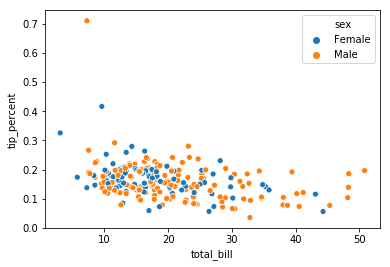

In [18]:
tips['tip_percent'] = tips['tip'] / tips['total_bill']
tips['bill_per_person'] = tips['total_bill'] / tips['size']
plot = seaborn.scatterplot(x='total_bill', y='tip_percent', hue='sex', data=tips)

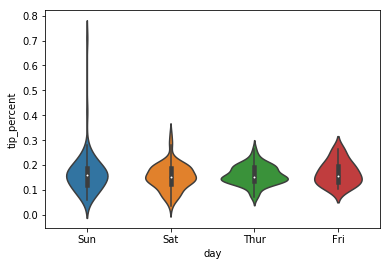

In [6]:
plot = seaborn.violinplot(x='day', y='tip_percent', data=tips)

## Find some stats

In [28]:
tips[['day', 'tip_percent']].groupby('day').describe()

tip_percent                                                              \
           count      mean       std       min       25%       50%       75%   
day                                                                            
Fri         19.0  0.169913  0.047665  0.103555  0.133739  0.155625  0.196637   
Sat         87.0  0.153152  0.051293  0.035638  0.123863  0.151832  0.188271   
Sun         76.0  0.166897  0.084739  0.059447  0.119982  0.161103  0.187889   
Thur        62.0  0.161276  0.038652  0.072961  0.138210  0.153846  0.192687   

                
           max  
day             
Fri   0.263480  
Sat   0.325733  
Sun   0.710345  
Thur  0.266312

In [29]:
tips[['smoker', 'tip_percent']].groupby('smoker').describe()

tip_percent                                                    \
             count      mean       std       min       25%       50%   
smoker                                                                 
No           151.0  0.159328  0.039910  0.056797  0.136906  0.155625   
Yes           93.0  0.163196  0.085119  0.035638  0.106771  0.153846   

                            
             75%       max  
smoker                      
No      0.185014  0.291990  
Yes     0.195059  0.710345

In [30]:
tips[['sex', 'tip_percent']].groupby('sex').describe()

tip_percent                                                    \
             count      mean       std       min       25%       50%   
sex                                                                    
Female        87.0  0.166491  0.053632  0.056433  0.140416  0.155581   
Male         157.0  0.157651  0.064778  0.035638  0.121389  0.153492   

                            
             75%       max  
sex                         
Female  0.194266  0.416667  
Male    0.186240  0.710345

In [31]:
tips[['time', 'tip_percent']].groupby('time').describe()

tip_percent                                                    \
             count      mean       std       min       25%       50%   
time                                                                   
Dinner       173.0  0.159221  0.067874  0.035638  0.122624  0.155219   
Lunch         67.0  0.164294  0.040522  0.072961  0.138678  0.154321   

                            
             75%       max  
time                        
Dinner  0.188147  0.710345  
Lunch   0.194224  0.266312